In [1806]:
print('hello world')
print('be productive')

hello world
be productive


In [1807]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# random.seed('spearhead')

# Surpress SettingsWithCopyWarning Error
pd.options.mode.copy_on_write = True

In [1808]:
ship_table = pd.read_csv('Ship_Performance_Dataset.csv')
# ship_table.head(2)

In [1809]:
ship_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [1810]:
# Better Approach
# ship_table.dropna(inplace=True)
# ship_table.reset_index(drop=True, inplace=True)
adjusted_ship_dataset = ship_table.dropna()
adjusted_ship_dataset = adjusted_ship_dataset.reset_index(drop=True)

# df.info()
# df.columns
# df.corr(numeric_only=True)

In [1811]:
# feature to use
# 6 && 7 && 10

feature1 = 'Engine_Power_kW'
feature2 = 'Distance_Traveled_nm'
feature3 = 'Cargo_Weight_tons'

# n_centroid = np.array([np.nan for _ in range(adjusted_ship_dataset.shape[0])])

k_mean_df = adjusted_ship_dataset[[feature1, feature2, feature3]] 
# k_mean_df['n_centroid'] = np.nan

k_mean_df.tail()

,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons
2122,1813.474360,147.964296,1450.181358
2123,1662.426557,1175.942724,451.670997
2124,2918.395972,239.990359,318.111891
2125,2028.143572,619.236340,153.441965
2126,2928.588108,1930.235779,712.997894


In [1812]:
# 3d graph using all three features
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2], k_mean_df[feature3])
# plt.show()

In [1813]:
# fig, ax = plt.subplots(figsize=(3, 3))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2])
# ax.set_ylabel(feature2)
# ax.set_xlabel(feature1)
# plt.show()

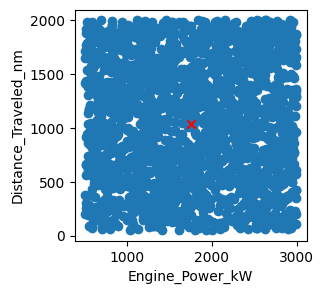

In [1814]:
centroid = [k_mean_df[feature1].mean(), k_mean_df[feature2].mean()]
# print(centroid1)
# k = 1
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [1815]:
def randompoint(feature):
  min = k_mean_df[feature].min()
  max = k_mean_df[feature].max()
  # print(min, max)
  return random.randint(min.astype(np.int64), max.astype(np.int64))

number_centroids = 5
centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])

print(centroids)

[[ 775  207]
 [2794 1569]
 [ 528 1827]
 [1198  608]
 [2717  186]]


[[ 775 2794  528 1198 2717]
 [ 207 1569 1827  608  186]]


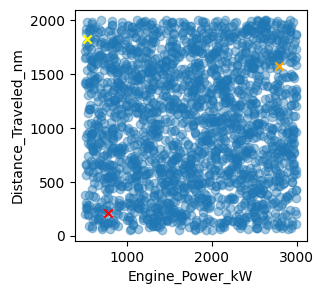

In [1816]:
transposed_centroids = centroids.T
print(transposed_centroids)

# k = 3
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], alpha=0.4)
# ax.scatter(transposed_centroids[0], transposed_centroids[1], color='red', marker='x')

ax.scatter(centroids[0][0], centroids[0][1], color='red', marker='x')
ax.scatter(centroids[1][0], centroids[1][1], color='orange', marker='x')
ax.scatter(centroids[2][0], centroids[2][1], color='yellow', marker='x')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [1817]:
# to be a function
# def distance():
#   return math.dist()

# distances_centroids = [[newdf[feature1][x], newdf[feature2][x]] for x in range(newdf.shape[0])]
# distances_centroids = [[newdf.iloc[x][feature1], newdf.iloc[x][feature2]] for x in range(newdf.shape[0])]
# distances_centroids = np.array([[math.dist([newdf.iloc[x][feature1], newdf.iloc[x][feature2]], [centroids[y][0], centroids[y][1]]) for y in range(len(centroids))] for x in range(newdf.shape[0])])
# distances_centroids = [x for x in range(len(newdf))]

distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
print(distances_centroids)

[[1330.78820616 1120.03370583 1481.72626825  749.94439654 1269.98491234]
 [ 983.50979825 1463.00015804 1618.69246567  453.41978842 1168.40963473]
 [ 930.45517773 1930.07206289  800.13761474  590.86182731 2032.58642429]
 ...
 [2143.64984452 1334.8187086  2869.24946706 1759.31617287  208.50730514]
 [1319.20719092 1220.07666884 1925.90856368  830.219613    813.76710698]
 [2758.16665358  385.49351046 2402.80687781 2177.89867874 1757.0224753 ]]


In [1818]:
# old solution but does not have centroid information
# sorted_distances_centroids = np.array([x[:1] for x in distances_centroids])

# distances_centroids = distances_centroids.where(distances_centroids.eq(distances_centroids.min(axis=1), axis=0))
# distances_centroids.head()

index_centroids = np.array([x.argmin() for x in distances_centroids])
# print(index_centroids)

k_mean_df['nearest_centroids'] = index_centroids 

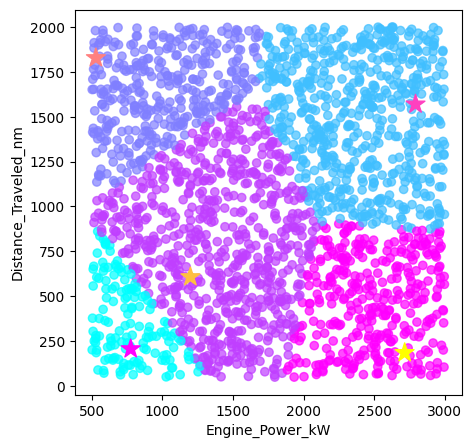

In [1819]:
# BETTER SOLUTION
fig, ax = plt.subplots(figsize=(5, 5))
# fig, ax = plt.subplots()

# Datasets
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)

# Centroids
centroid_x = centroids[:, 0]
centroid_y = centroids[:, 1]
colors = ['black', 'green', 'blue']
plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)

# plt.colorbar(ax)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [1820]:
# # transposed_centroids = centroids.T
# # print(transposed_centroids)

# SHIT SOLUTION
# k = 3
# fig, ax = plt.subplots(figsize=(10, 10))
# # ax.scatter(newdf[feature1], df[feature2])

# for x in range(len(distances_centroids)):

#   c = distances_centroids.iloc[x].dropna().index[0]
#   if c == 'a':
#     c = 'red'
#   elif c == 'b':
#     c = 'orange'
#   elif c == 'c':
#     c = 'yellow'

#   ax.scatter(newdf.iloc[x][feature1], newdf.iloc[x][feature2], color=c)

# ax.scatter(centroids[0][0], centroids[0][1], color='black', marker='x')
# ax.scatter(centroids[1][0], centroids[1][1], color='green', marker='x')
# ax.scatter(centroids[2][0], centroids[2][1], color='blue', marker='x')

# ax.set_xlabel(feature1)
# ax.set_ylabel(feature2)
# plt.show()